# 시계열 데이터 특성 (4가지)
## Trends
- Upward
- Horizontal / STATIONARY
- Downward

## Seasonality
- 비교적 짧은 턴으로 반복되는 트렌드
- 매년 오르락 내리락 하는 듯한


## Cyclical (주기적)
- Long term 패턴 / 일정하지 않은 기간의 트렌드

## (4) Noise
- 어느 규칙성도 없음

![tsa_ex](tsa_image/tsa_ex.PNG)

- 좌상단 : 연간 패턴이 보임 / Cyclical 적인 패턴도 보임.
- 우상단 : 하향트렌드 / Seasonality pattern 없음 / Cylical도 Data가 너무 적어서 없음
- 좌하단 : 상향 트렌드 확실 / Seasonality pattrn 강함 / 
- 우하단 : Noise -> 히스토그램그려서 가우시안 분포를 그려야 함.

## ETS 모델 (Error, Trend, Seasonality) 
- 데이터의 패턴을 더 잘파악하기 위해서 또는 예측을 수행하기 위해 Smoothing을 함
- **Smoothing 을 위해서 Error, Trend, Seaonality 요소들을 활용 각각을 더하거나 곱하여 Smoothing을 함**
- ETS Decomposition : ETS 컴포넌트들을 시각화하여 데이터의 흐름을 이해하느넋이 중요!

![tsa_airlinepassengers](tsa_image/tsa_airlinepassengers.PNG)

- Observerd는 Trend + Seasonality + Residual 로 찢어짐.


### Additive Model

$y_t = Level + Trend + Seasonality + Noise$
$y_t = Trend + Seasonality + Error(Level + Noise)$ => ETS 모델링

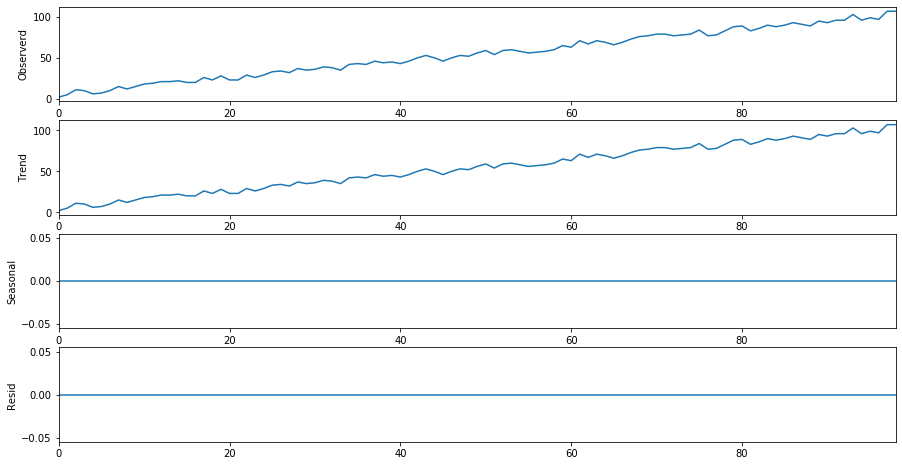

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

# 1 ~ 100까지중에 Noise (np.random.randint(10)) 섞은 예제.
# 상향적인 트렌드인건 여전하다.
series = pd.Series([i+np.random.randint(10) for i in range(1,100)])

# seasonal_decompose 함수를 이용해 분리 가능
result = seasonal_decompose(series, model='additive', period=1)
# result 속성에 observerd, trend, seasonal, resid 가 있음.

# 이렇게 해도 되고 / result.plot() 해도 됨.
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')
    
plot_decompose(result)

### Multiplicative Model (곱하기)

$y_t = Level \times Trend \times Seasonality \times Noise$

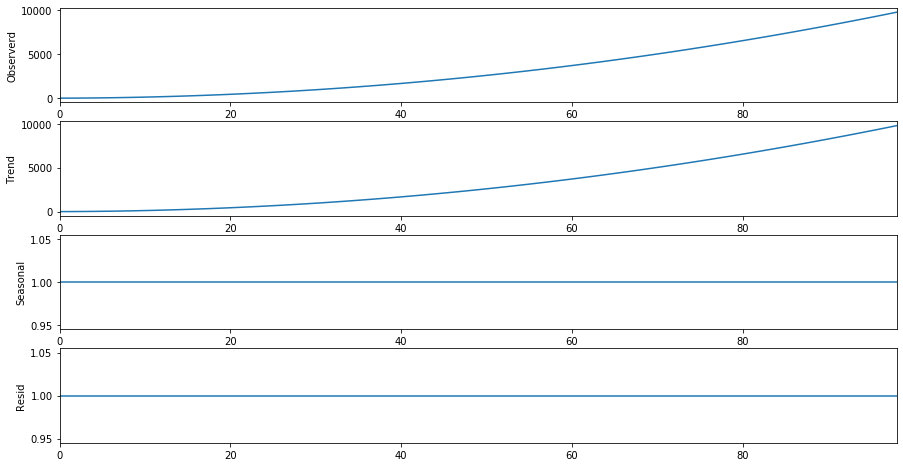

In [27]:
# 제곱 증가
series = pd.Series([i**2 for i in range(1,100)])
result = seasonal_decompose(series, model='multiplicative', period=1)

plot_decompose(result)
# => seasonal과 Resid 는 보이지 않음.

In [22]:
# 공항 데이터
airline = pd.read_csv('tsa_data/airline_passengers.csv', index_col='Month')
print(airline.shape)
airline.head()

(144, 1)


,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


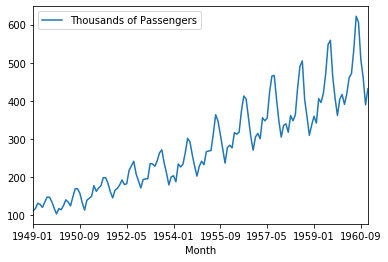

In [23]:
airline.plot()

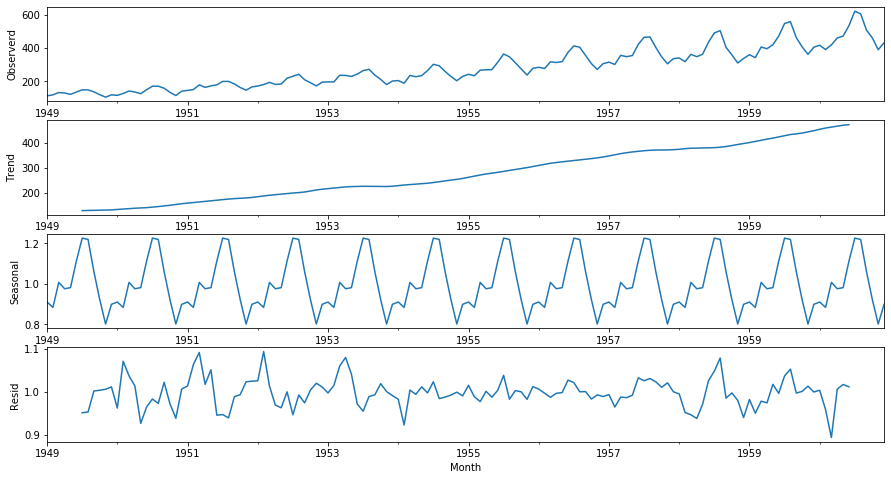

In [25]:
# datetime 으로 변화하고
airline.index = pd.to_datetime(airline.index)
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
plot_decompose(result)

## ETS

linear trend 를 가지고 있고 seasonality 와 trend 컴포넌트가 시간흐름에 따라 고정적일 때 (ex 매년 승객 1만명 증가) additive model 을 사용합니다. non-linear 하게 증가하거나 감소하는 trend 를 보일 경우 (ex 매년 승객 수 두 배 증가) multiplicative model 이 더 적합합니다.

챠트를 보면 초기에 비해 후기로 갈 수록 꾸준히 증가하는 비율로 비선형 증가 추세를 보이고 있습니다.

In [ ]:
# Resid 는 눈으로는 패턴을 발견할 수 없는데, 다른 모델로 패턴을 확인할 수 있다.

# 일반적으로 시계열 모델링할 때는
# 트렌드를 제거하고 Seasonality를 뺸다음에 Noise에서 패턴을 얻어다가 모델링하고
# 모델링 한 것에 prediction 할때는 Seasonality를 더하고 트렌드를 더하는 방식으로 함